In [120]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [121]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [122]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [123]:
tr_df = train_df('/Users/lovishmiglani/B_Tclass/Training')

In [124]:
tr_df

,Class Path,Class
0,/Users/lovishmiglani/B_Tclass/Training/pituita...,pituitary
1,/Users/lovishmiglani/B_Tclass/Training/pituita...,pituitary
2,/Users/lovishmiglani/B_Tclass/Training/pituita...,pituitary
3,/Users/lovishmiglani/B_Tclass/Training/pituita...,pituitary
4,/Users/lovishmiglani/B_Tclass/Training/pituita...,pituitary
...,...,...
5707,/Users/lovishmiglani/B_Tclass/Training/meningi...,meningioma
5708,/Users/lovishmiglani/B_Tclass/Training/meningi...,meningioma
5709,/Users/lovishmiglani/B_Tclass/Training/meningi...,meningioma
5710,/Users/lovishmiglani/B_Tclass/Training/meningi...,meningioma


In [125]:
ts_df = test_df('/Users/lovishmiglani/B_Tclass/Testing')

In [126]:
ts_df

,Class Path,Class
0,/Users/lovishmiglani/B_Tclass/Testing/pituitar...,pituitary
1,/Users/lovishmiglani/B_Tclass/Testing/pituitar...,pituitary
2,/Users/lovishmiglani/B_Tclass/Testing/pituitar...,pituitary
3,/Users/lovishmiglani/B_Tclass/Testing/pituitar...,pituitary
4,/Users/lovishmiglani/B_Tclass/Testing/pituitar...,pituitary
...,...,...
1307,/Users/lovishmiglani/B_Tclass/Testing/meningio...,meningioma
1308,/Users/lovishmiglani/B_Tclass/Testing/meningio...,meningioma
1309,/Users/lovishmiglani/B_Tclass/Testing/meningio...,meningioma
1310,/Users/lovishmiglani/B_Tclass/Testing/meningio...,meningioma


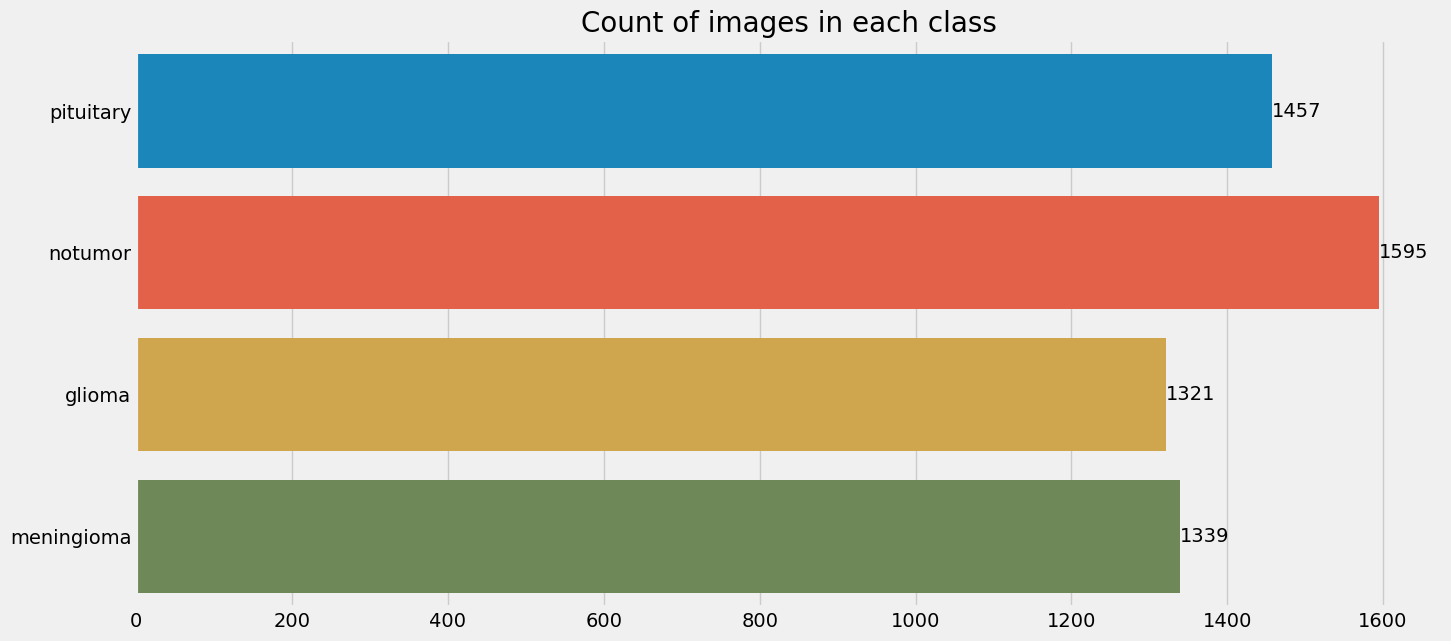

In [127]:
# Count of images in each class in train data
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

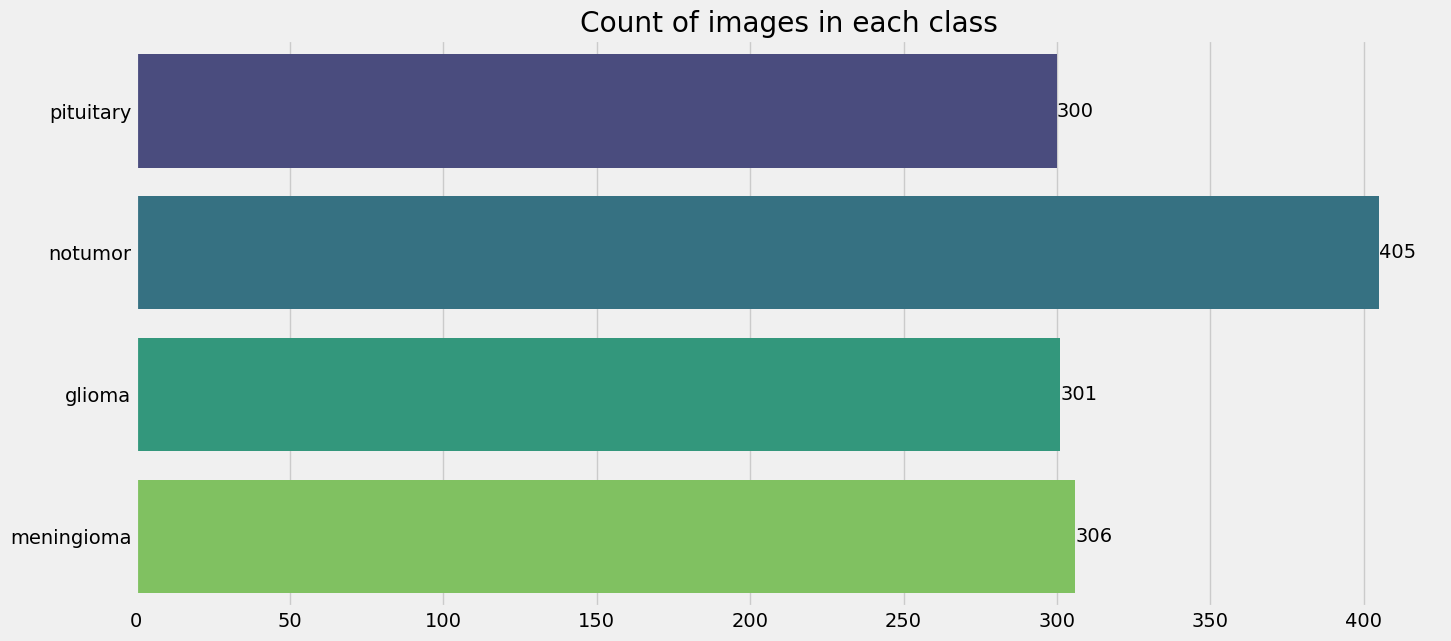

In [128]:
#Count each class in test data
plt.figure(figsize=(15, 7))
ax = sns.countplot(y=ts_df['Class'], palette='viridis')

ax.set(xlabel='', ylabel='', title='Count of images in each class')
ax.bar_label(ax.containers[0])

plt.show()

In [129]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])

In [130]:
valid_df

,Class Path,Class
992,/Users/lovishmiglani/B_Tclass/Testing/glioma/T...,glioma
1024,/Users/lovishmiglani/B_Tclass/Testing/meningio...,meningioma
61,/Users/lovishmiglani/B_Tclass/Testing/pituitar...,pituitary
1079,/Users/lovishmiglani/B_Tclass/Testing/meningio...,meningioma
814,/Users/lovishmiglani/B_Tclass/Testing/glioma/T...,glioma
...,...,...
764,/Users/lovishmiglani/B_Tclass/Testing/glioma/T...,glioma
554,/Users/lovishmiglani/B_Tclass/Testing/notumor/...,notumor
978,/Users/lovishmiglani/B_Tclass/Testing/glioma/T...,glioma
1200,/Users/lovishmiglani/B_Tclass/Testing/meningio...,meningioma


In [131]:
img_size = (299, 299)

In [132]:
batch_size = 32

_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

valid_gen = _gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=16,
                                  target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


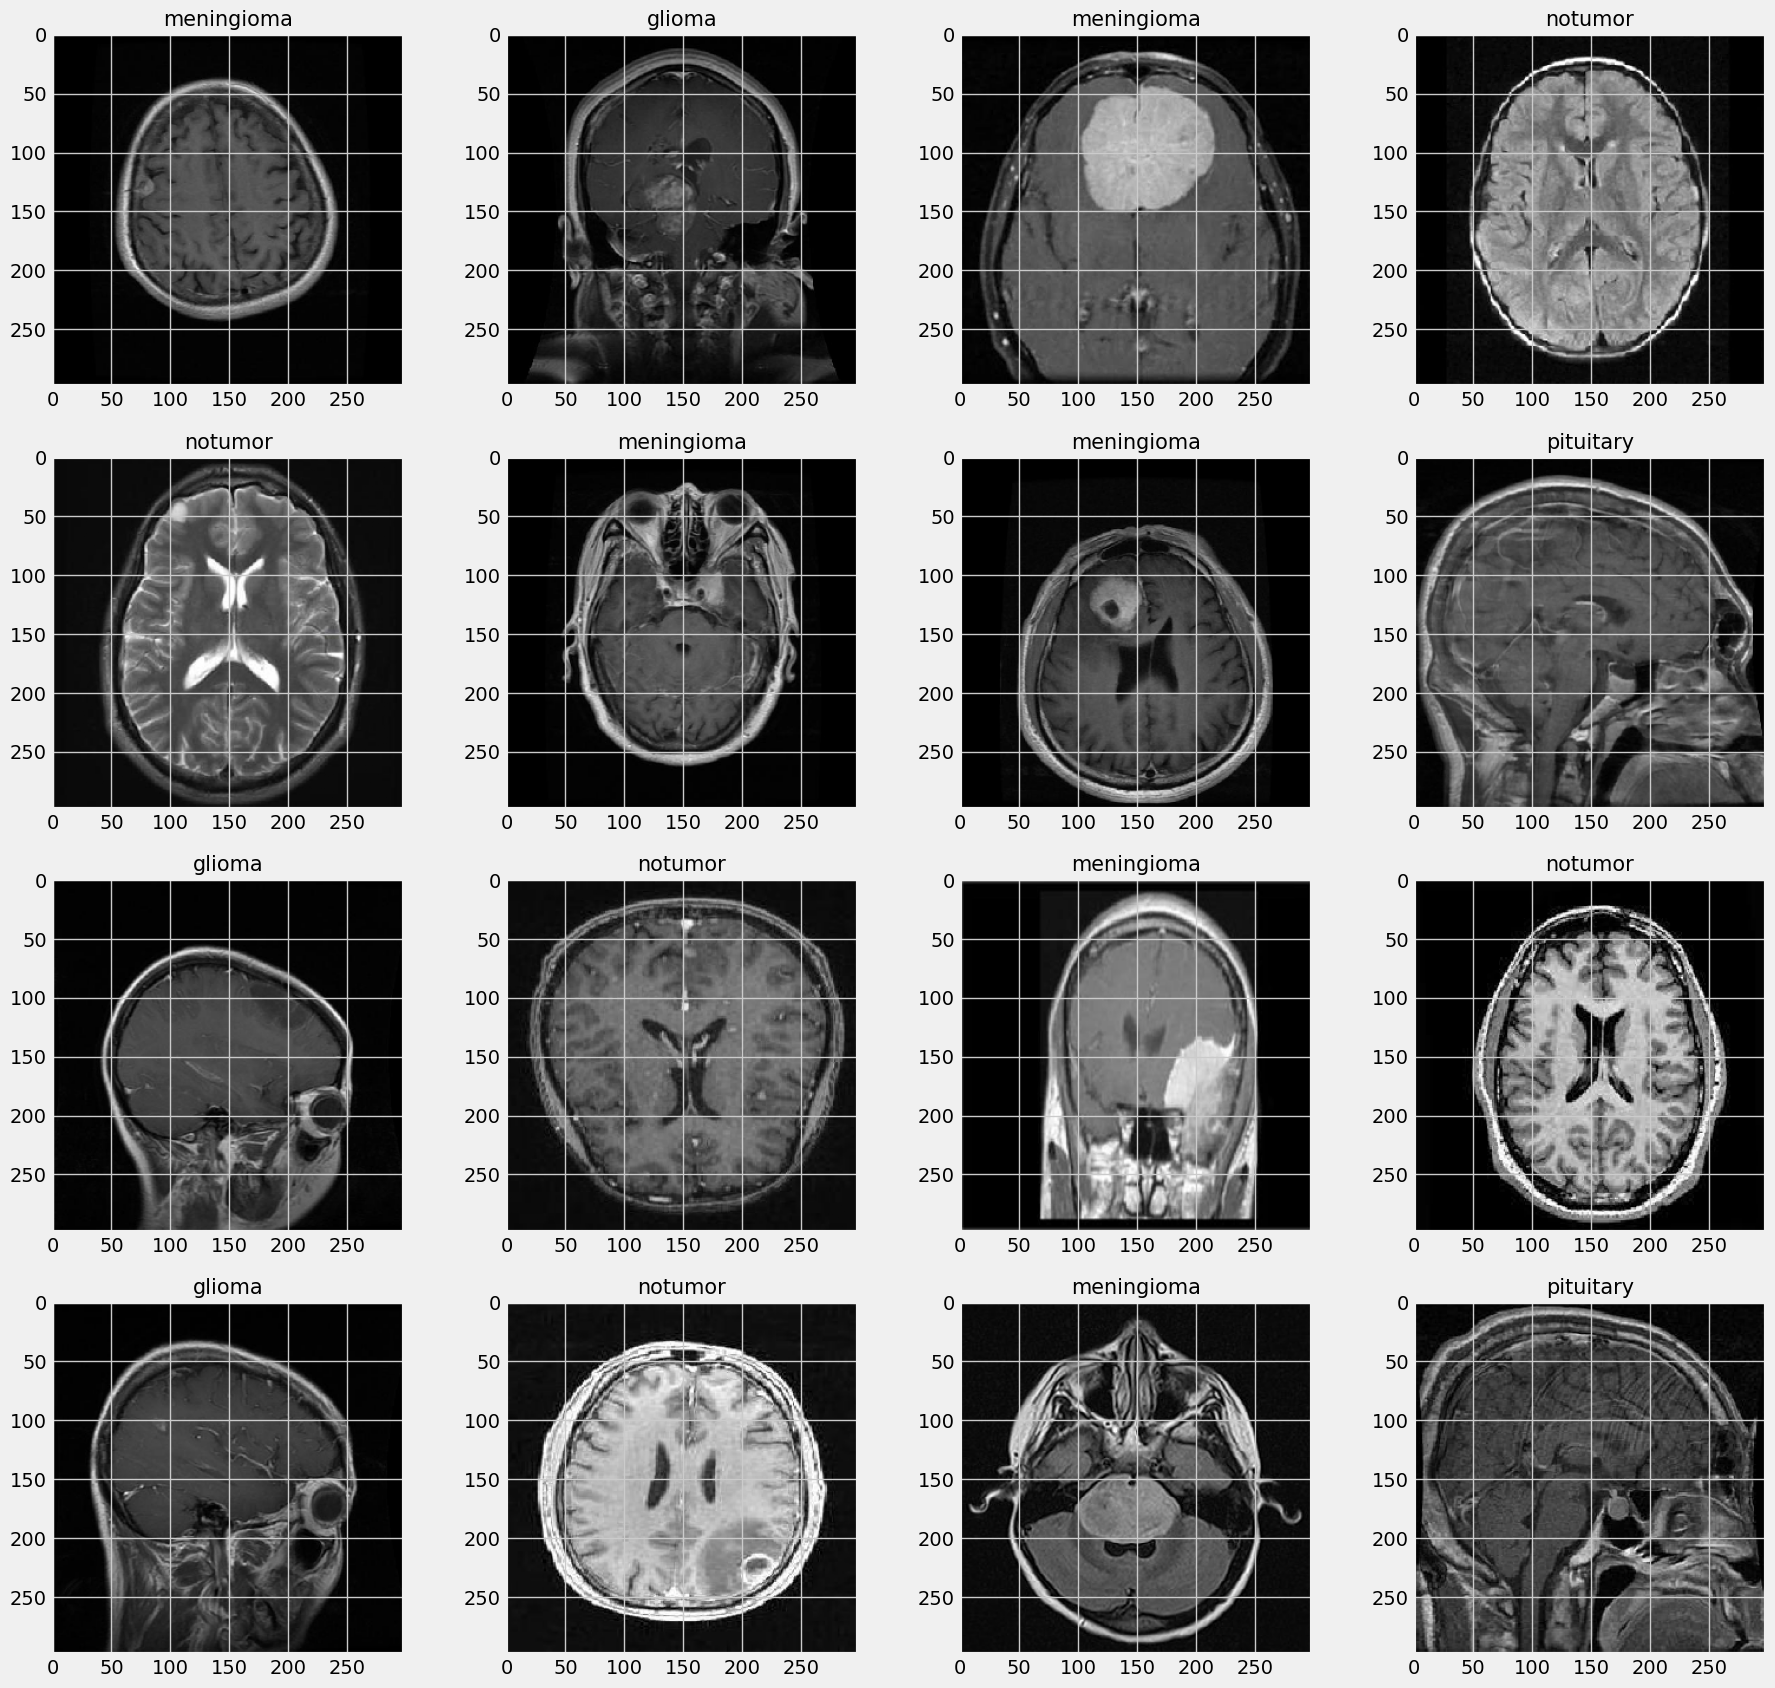

In [133]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4,4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()

In [134]:
img_shape=(299,299,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')

# for layer in base_model.layers:
#     layer.trainable = False
    
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(4, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_6 (Dropout)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               262272    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 4)                 516       
                                                                 
Total params: 21124268 (80.58 MB)
Trainable params: 21

In [135]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [16]:
hist = model.fit(tr_gen,
                 epochs=15,
                 validation_data=valid_gen,
                 shuffle= False)

Epoch 1/15
179/179 [==============================] - 4517s 25s/step - loss: 0.3669 - accuracy: 0.8718 - precision: 0.9156 - recall: 0.8321 - val_loss: 0.2262 - val_accuracy: 0.9237 - val_precision: 0.9253 - val_recall: 0.9218
Epoch 2/15
179/179 [==============================] - 3872s 22s/step - loss: 0.0676 - accuracy: 0.9786 - precision: 0.9803 - recall: 0.9774 - val_loss: 0.0621 - val_accuracy: 0.9771 - val_precision: 0.9771 - val_recall: 0.9771
Epoch 3/15
179/179 [==============================] - 3959s 22s/step - loss: 0.0338 - accuracy: 0.9895 - precision: 0.9900 - recall: 0.9886 - val_loss: 0.0540 - val_accuracy: 0.9847 - val_precision: 0.9885 - val_recall: 0.9828
Epoch 4/15
179/179 [==============================] - 2815s 16s/step - loss: 0.0269 - accuracy: 0.9909 - precision: 0.9911 - recall: 0.9904 - val_loss: 0.1080 - val_accuracy: 0.9733 - val_precision: 0.9733 - val_recall: 0.9733
Epoch 5/15
179/179 [==============================] - 2744s 15s/step - loss: 0.0172 - accura

In [17]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

In [18]:
model.save('Xception.h5')

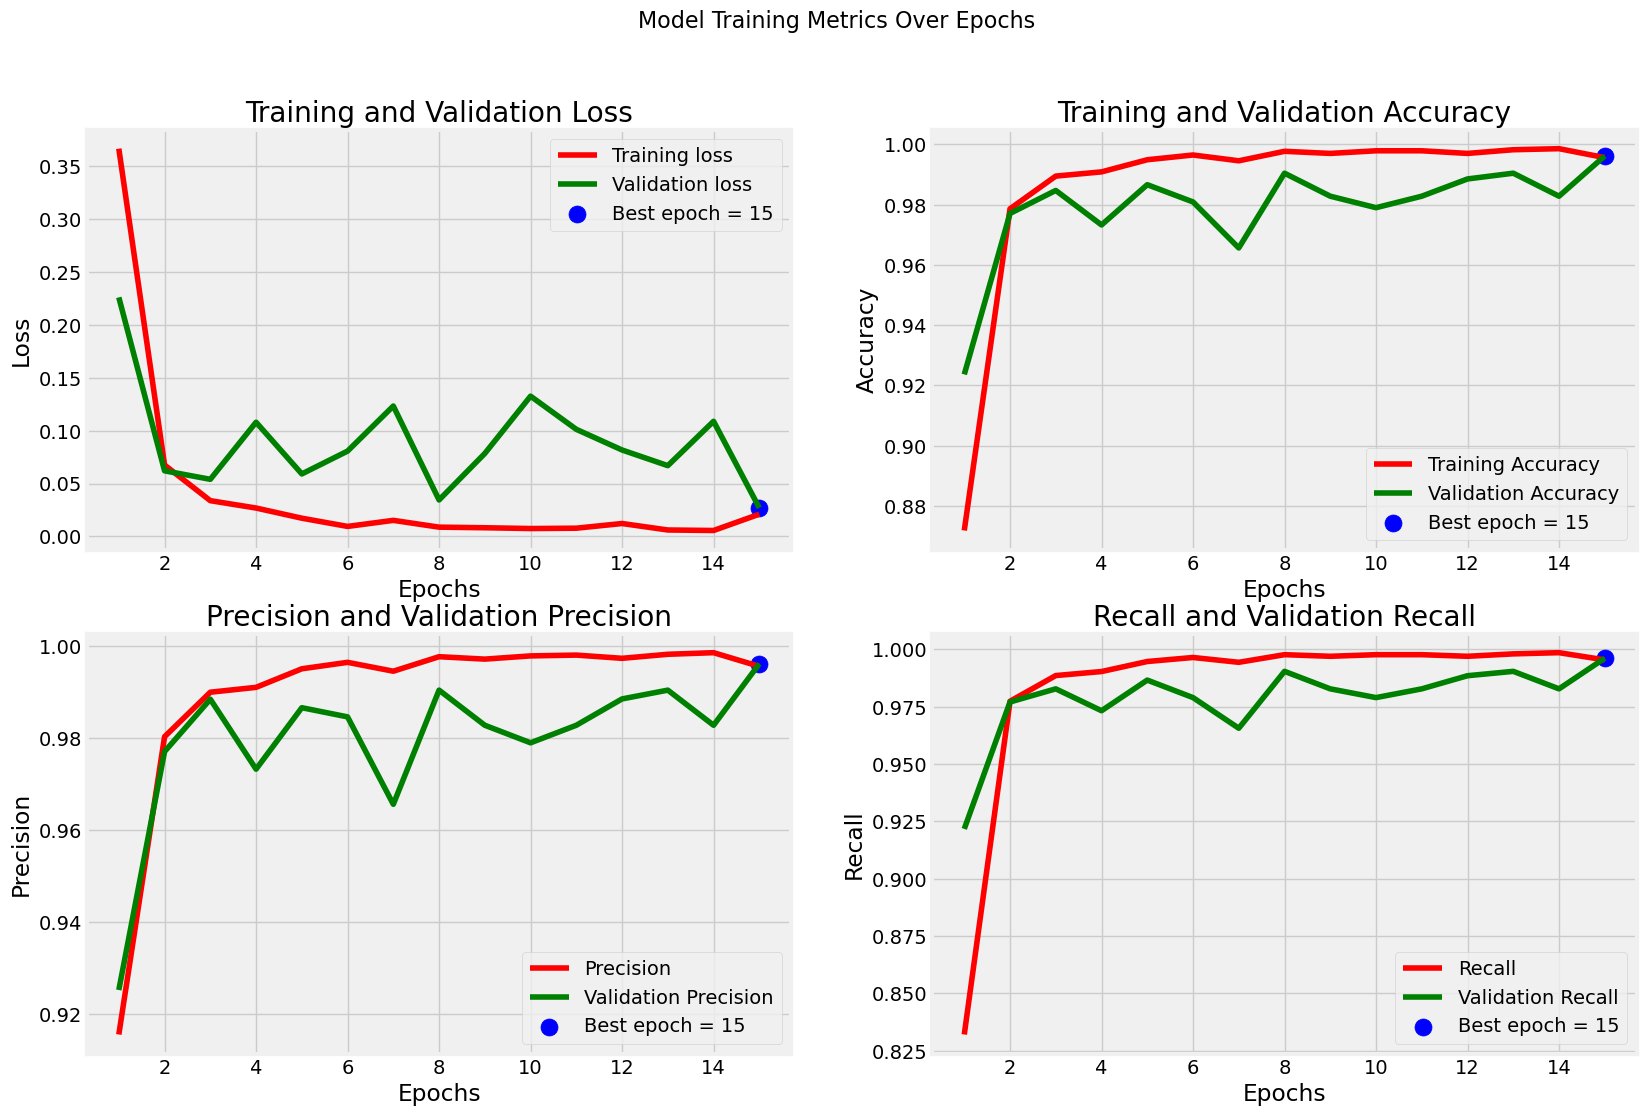

In [19]:
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [20]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")


50/50 [==============================] - 125s 2s/step - loss: 0.0598 - accuracy: 0.9911 - precision: 0.9911 - recall: 0.9911
Train Loss: 0.0018
Train Accuracy: 99.93%
--------------------
Validation Loss: 0.0313
Validation Accuracy: 99.43%
--------------------
Test Loss: 0.0598
Test Accuracy: 99.11%


In [29]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

50/50 [==============================] - 102s 2s/step


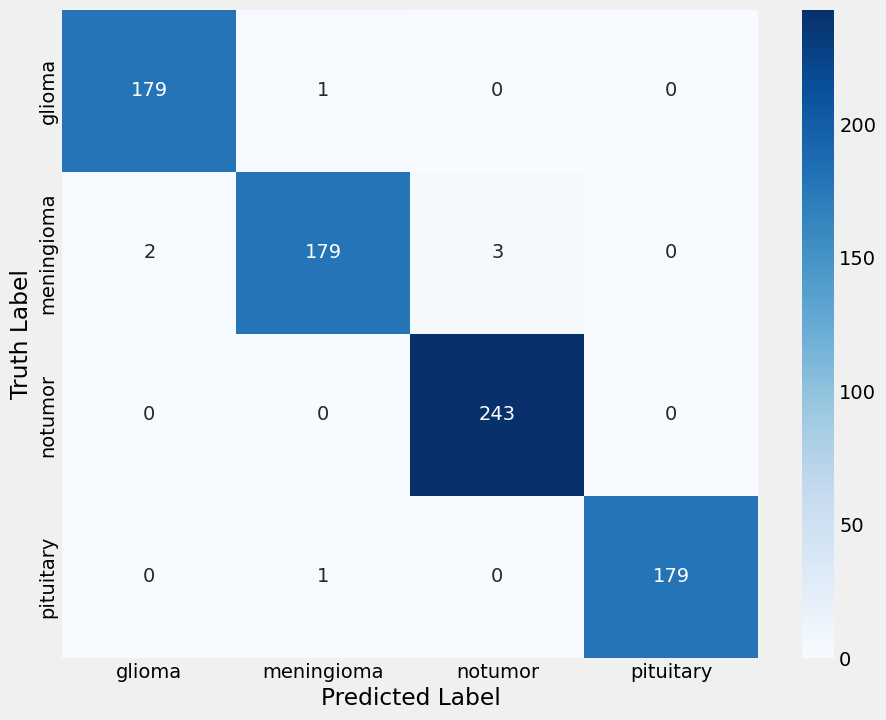

In [24]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [25]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       180
           1       0.99      0.97      0.98       184
           2       0.99      1.00      0.99       243
           3       1.00      0.99      1.00       180

    accuracy                           0.99       787
   macro avg       0.99      0.99      0.99       787
weighted avg       0.99      0.99      0.99       787



In [136]:
hist2 = model.fit(tr_gen,
                 epochs=15,
                 validation_data=valid_gen,
                 shuffle= False)

Epoch 1/15
179/179 [==============================] - 4281s 24s/step - loss: 1.4079 - accuracy: 0.2721 - precision_3: 0.2203 - recall_3: 0.0023 - val_loss: 1.3843 - val_accuracy: 0.3099 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 2/15
179/179 [==============================] - 4158s 23s/step - loss: 1.3847 - accuracy: 0.2792 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 1.3829 - val_accuracy: 0.3099 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 3/15
179/179 [==============================] - 2882s 16s/step - loss: 1.3584 - accuracy: 0.3193 - precision_3: 0.7956 - recall_3: 0.0191 - val_loss: 1.2514 - val_accuracy: 0.5893 - val_precision_3: 0.9636 - val_recall_3: 0.0809
Epoch 4/15
179/179 [==============================] - 2993s 17s/step - loss: 0.2734 - accuracy: 0.9004 - precision_3: 0.9183 - recall_3: 0.8782 - val_loss: 0.1908 - val_accuracy: 0.9405 - val_precision_3: 0.9568 - val_recall_3: 0.9130
Epoch 5/15
179/179 [================

In [137]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

In [138]:
model.save('Xception2.h5')

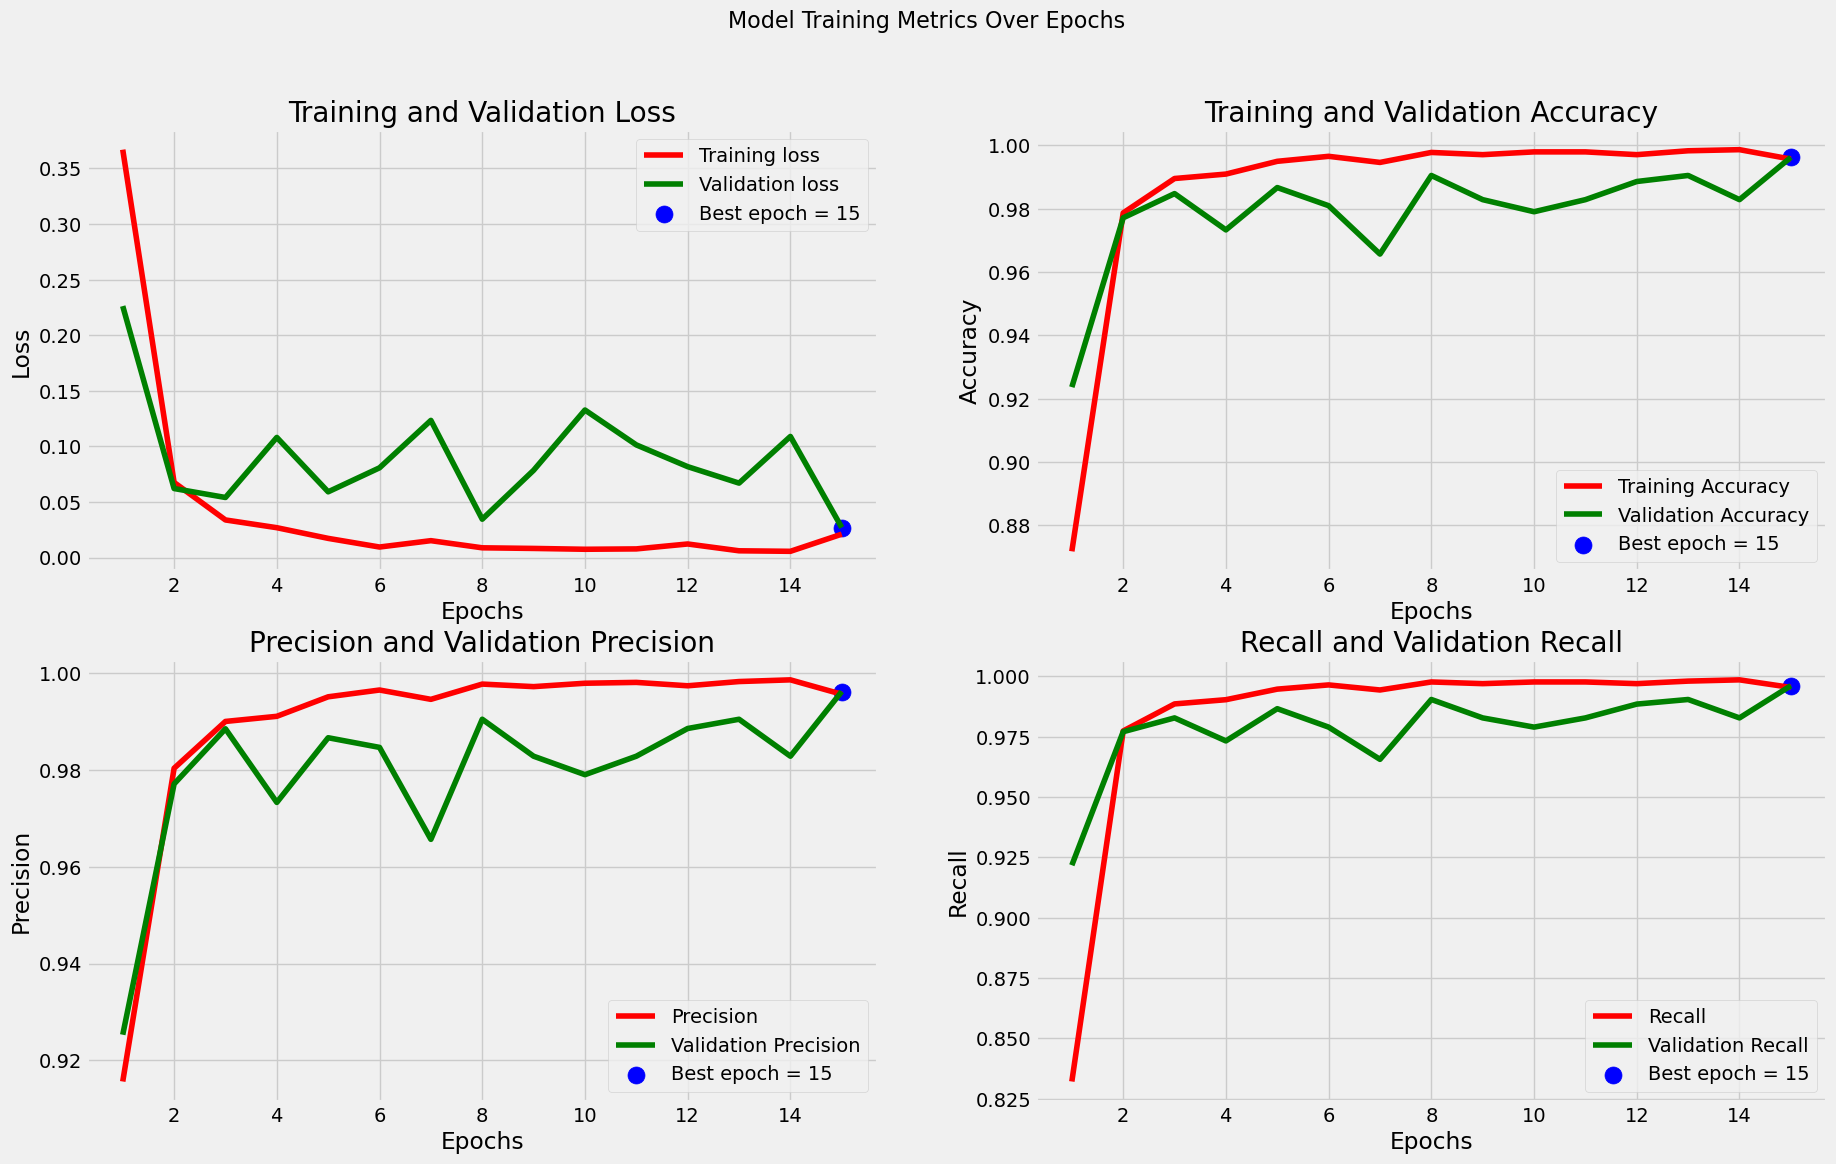

In [139]:
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [140]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

41/41 [==============================] - 41s 990ms/step


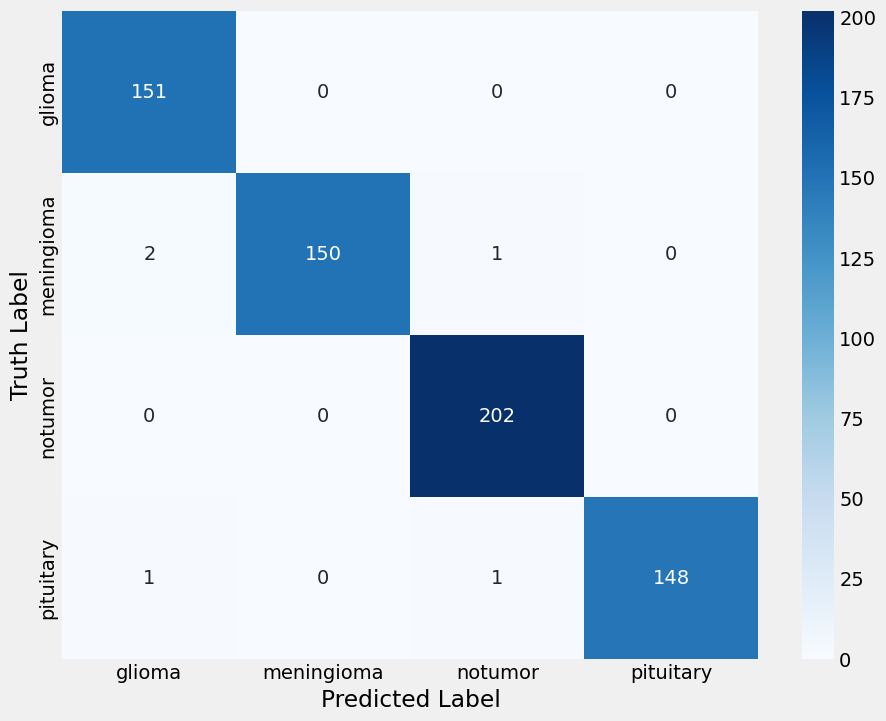

In [141]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [142]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       151
           1       1.00      0.98      0.99       153
           2       0.99      1.00      1.00       202
           3       1.00      0.99      0.99       150

    accuracy                           0.99       656
   macro avg       0.99      0.99      0.99       656
weighted avg       0.99      0.99      0.99       656



In [143]:
from tensorflow.keras.models import load_model

model = load_model('Xception2.h5')

In [144]:
def predict(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = model.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()
#     print(top p)

In [216]:
# top_label, top_probability = predict(img_path)
predict('/Users/lovishmiglani/dataset/yes/Y72.jpg')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/lovishmiglani/dataset/yes/Y72.jpg'

<Figure size 1200x1200 with 0 Axes>